In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

In [4]:
pip install pip-api

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
posts = api.user_timeline(screen_name="narendramodi", count = 1000, lang ="en", tweet_mode="extended")

In [7]:
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) देशवासियों को गुरु पूर्णिमा की ढेरों शुभकामनाएं। जीवन को सार्थक बनाने वाले गुरुओं के प्रति सम्मान प्रकट करने का आज विशेष दिन है। इस अवसर पर सभी गुरुजनों को मेरा सादर नमन।

2) Best wishes to my senior Cabinet colleague Shri @irvpaswan Ji. Paswan Ji’s administrative experience and insight on key policy issues are a major asset for our Government. His contribution towards social justice is immense. Praying for his long and healthy life.

3) भाजपा के प्रत्येक कार्यकर्ता को अपने साथ सात ‘स’ की शक्ति लेकर आगे बढ़ना चाहिए। 
ये हैं-
पहला- सेवाभाव, 
दूसरा- संतुलन, 
तीसरा- संयम, 
चौथा- समन्वय, 
पांचवां- सकारात्मकता, 
छठा- सद्भावना 
और सातवां- संवाद। https://t.co/NnelweAMV9

4) हम चाहे कार्यकर्ता की भूमिका में हों या सरकार में, वास्तव में हम देश की और गरीबों की सेवा का माध्यम ही हैं।

यह सरकार छह सालों से इसी विचार के साथ काम कर रही है और फैसले ले रही है। https://t.co/RvPG4vKdSt

5) कोरोना के इस संकट काल में समाज ने आपको स्नेह दिया है, विश्वास दिया है।

आप किसी गरीब 

In [35]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,भाजपा के प्रत्येक कार्यकर्ता को अपने साथ सात ‘...
1,हम चाहे कार्यकर्ता की भूमिका में हों या सरकार ...
2,कोरोना के इस संकट काल में समाज ने आपको स्नेह द...
3,"हमारे लिए हमारे संगठन का मतलब है- सेवा, सबका स..."
4,हम लोगों ने राजनीति में सत्ता को सेवा का माध्य...


In [36]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Tweets
0,भाजपा के प्रत्येक कार्यकर्ता को अपने साथ सात ‘...
1,हम चाहे कार्यकर्ता की भूमिका में हों या सरकार ...
2,कोरोना के इस संकट काल में समाज ने आपको स्नेह द...
3,"हमारे लिए हमारे संगठन का मतलब है- सेवा, सबका स..."
4,हम लोगों ने राजनीति में सत्ता को सेवा का माध्य...


In [37]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,भाजपा के प्रत्येक कार्यकर्ता को अपने साथ सात ‘...,0.000000,0.000000
1,हम चाहे कार्यकर्ता की भूमिका में हों या सरकार ...,0.000000,0.000000
2,कोरोना के इस संकट काल में समाज ने आपको स्नेह द...,0.000000,0.000000
3,"हमारे लिए हमारे संगठन का मतलब है- सेवा, सबका स...",0.333333,0.250000
4,हम लोगों ने राजनीति में सत्ता को सेवा का माध्य...,0.000000,0.000000
...,...,...,...
195,Addressing the 25th anniversary programme of R...,0.000000,0.000000
196,लॉकडाउन में जीवन की रफ्तार थोड़ी धीमी तो हुई ह...,0.000000,0.000000
197,Some interesting details about Ayushman Bharat...,0.522727,0.363636
198,अंतर्राष्ट्रीय योग दिवस जल्द ही आने वाला है। क...,0.000000,0.000000


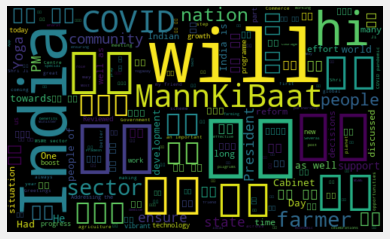

In [38]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,भाजपा के प्रत्येक कार्यकर्ता को अपने साथ सात ‘...,0.000000,0.000000,Neutral
1,हम चाहे कार्यकर्ता की भूमिका में हों या सरकार ...,0.000000,0.000000,Neutral
2,कोरोना के इस संकट काल में समाज ने आपको स्नेह द...,0.000000,0.000000,Neutral
3,"हमारे लिए हमारे संगठन का मतलब है- सेवा, सबका स...",0.333333,0.250000,Positive
4,हम लोगों ने राजनीति में सत्ता को सेवा का माध्य...,0.000000,0.000000,Neutral
...,...,...,...,...
195,Addressing the 25th anniversary programme of R...,0.000000,0.000000,Neutral
196,लॉकडाउन में जीवन की रफ्तार थोड़ी धीमी तो हुई ह...,0.000000,0.000000,Neutral
197,Some interesting details about Ayushman Bharat...,0.522727,0.363636,Positive
198,अंतर्राष्ट्रीय योग दिवस जल्द ही आने वाला है। क...,0.000000,0.000000,Neutral


In [40]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) हमारे लिए हमारे संगठन का मतलब है- सेवा, सबका संग, सबका साथ, सबका सुख, सबकी समृद्धि।
 
हमारा संगठन समाज हित के लिए काम करने वाला है, संघर्ष करने वाला है, समाज और देश के लिए खप जाने वाला है।
 
हमारे लिए हमेशा ‘Nation First’ रहा है। 

2) India is placing great importance to education in the agricultural sector that benefits the farmers. India is proud of its traditional agro knowledge and will complement it with latest technology to ensure a boost to the income of farmers.

3) Other aspects relating to ICAR which we discussed included research on  indigenous breeds of dogs and horses, mission mode approach for vaccination to cure Foot and Mouth disease, study of grasses and local fodder crops and ensuring easy access to farm equipment.

4) India is working towards increased organic farming as well as farming on a cluster based approach. Efforts are also ongoing to encourage start-ups related to agriculture, especially ones that encourage usage of latest techn

In [41]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Pained by the tragic demise of Sikh pilgrims in Pakistan. My thoughts are with their families and friends in this hour of grief.

I pray that those pilgrims injured recover at the earliest.

2) Committed to a vibrant MSME Sector!

The Cabinet approved an interest subvention scheme for Shishu loan accounts under Pradhan Mantri Mudra Yojana. This scheme would provide valuable support and stability to small businesses. 

3) During today's Cabinet Meeting, landmark decisions have been taken aimed at accelerating economic growth, our strides in space as well as assisting our farmers, villages and small businesses. Crores of Indians will gain from the decisions. 

4) Thank you Mrs. Sophie Trudeau for the support towards Yoga as well as YogaDay. 

Mrs. Trudeau’s words will go a long way in popularising Yoga globally. 

5) In addition to the redevelopment at Kedarnath, we discussed ways to develop other heritage centres from Ramban to Kedarnath. Development of cen

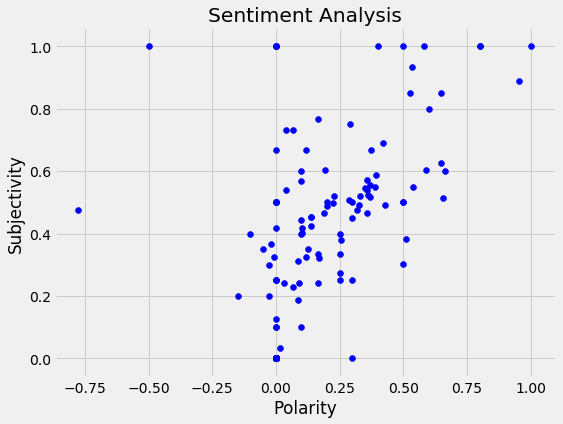

In [42]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [43]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

39.0

In [44]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

4.5

In [45]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

56.5

In [46]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     113
Positive     78
Negative      9
Name: Analysis, dtype: int64

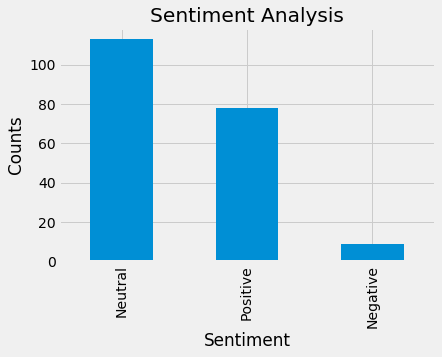

In [47]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()